In [ ]:
#Import the libararies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create feuatres and labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Create a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)


In [ ]:
#Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),  
  tf.keras.layers.Dense(1)  
])


# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr =0.01),
                        metrics=["mae"])

# 3. Fir the model
history = insurance_model.fit(X_train, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 0s 878us/step - loss: 12572.1433 - mae: 12572.1433
Epoch 2/150
34/34 [==============================] - 0s 1ms/step - loss: 7327.3403 - mae: 7327.3403
Epoch 3/150
34/34 [==============================] - 0s 963us/step - loss: 6902.4516 - mae: 6902.4516
Epoch 4/150
34/34 [==============================] - 0s 853us/step - loss: 7358.0753 - mae: 7358.0753
Epoch 5/150
34/34 [==============================] - 0s 823us/step - loss: 7000.9479 - mae: 7000.9479
Epoch 6/150
34/34 [==============================] - 0s 875us/step - loss: 6693.5792 - mae: 6693.5792
Epoch 7/150
34/34 [==============================] - 0s 874us/step - loss: 6395.4552 - mae: 6395.4552
Epoch 8/150
34/34 [==============================] - 0s 939us/step - loss: 6472.0169 - mae: 6472.0169
Epoch 9/150
34/34 [==============================] - 0s 968us/step - loss: 6298.0480 - mae: 6298.0480
Epoch 10/150
34/34 [==============================] - 0s 951us/step - loss: 6177.8

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3196.4973 - mae: 3196.4973


[3196.497314453125, 3196.497314453125]

Text(0.5, 0, 'epochs')

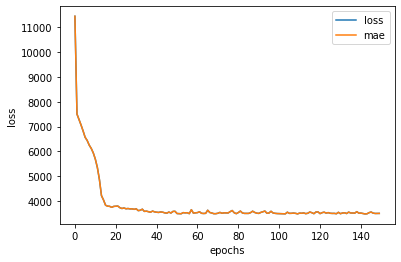

In [ ]:
#Plotting the history variable
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(), ["age", "bmi", "children"]),
  (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Build a neural network
tf.random.set_seed(42)

#Create the model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                
])

#Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr =0.01),
                        metrics=["mae"])

#Fit the model
history = insurance_model2.fit(X_train_normal,y_train, epochs=150 )

Epoch 1/150
34/34 [==============================] - 0s 1ms/step - loss: 13254.8789 - mae: 13254.8789
Epoch 2/150
34/34 [==============================] - 0s 1ms/step - loss: 11784.7705 - mae: 11784.7705
Epoch 3/150
34/34 [==============================] - 0s 1ms/step - loss: 7911.8880 - mae: 7911.8880
Epoch 4/150
34/34 [==============================] - 0s 1ms/step - loss: 7968.5020 - mae: 7968.5020
Epoch 5/150
34/34 [==============================] - 0s 1ms/step - loss: 7328.0949 - mae: 7328.0949
Epoch 6/150
34/34 [==============================] - 0s 1ms/step - loss: 6783.2004 - mae: 6783.2004
Epoch 7/150
34/34 [==============================] - 0s 1ms/step - loss: 5888.1695 - mae: 5888.1695
Epoch 8/150
34/34 [==============================] - 0s 1ms/step - loss: 4855.4473 - mae: 4855.4473
Epoch 9/150
34/34 [==============================] - 0s 1ms/step - loss: 3780.6063 - mae: 3780.6063
Epoch 10/150
34/34 [==============================] - 0s 1ms/step - loss: 3722.8480 - mae: 3722.

In [ ]:
insurance_model2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3157.2109 - mae: 3157.2109


[3157.2109375, 3157.2109375]